## Wild Blueberry Yield Prediction

----
The dataset used for predictive modelling was generated by the Wild Blueberry Pollination Simulation Model, which is an open-source, spatially-explicit computer simulation program that enables exploration of how various factors, including plant spatial arrangement, outcrossing and self-pollination, bee species compositions and weather conditions, in isolation and combination, affect pollination efficiency and yield of the wild blueberry agro-ecosystem. The simulation model has been validated by the field observation and experimental data collected in Maine USA and Canadian Maritimes during the last 30 years. and now is a useful tool for hypothesis testing and theory development for wild blueberry pollination researches.

**dataset_link: https://www.kaggle.com/datasets/samikshakolhe/wild-blueberry-yield-prediction**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [9]:
# Get the dataset
df = pd.read_csv('WildBlueberryPollinationSimulationData.csv')
df.head()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


In [11]:
df.shape

(777, 18)

#### Dataset contains 777rows and 18 features

### Understand Each Feature Step-by-step

1. Clonesize: The average blueberry clone size in the field
2. Honeybee: Honeybee density in the field
3. Bumbles: Bumblebee density in the field
4. Andrena: Andrena bee density in the field
5. Osmia: Osmia bee density in the field
6. MaxOfUpperTRange: The highest record of the upper band daily air temperature during the bloom season
7. MinOfUpperTRange: The lowest record of the upper band daily air temperature
8. AverageOfUpperTRange: The average of the upper band daily air temperature
9. MinOfLowerTRange: The lowest record of the lower band daily air temperature
10. RainingDays: The total number of days during the bloom season, each of which has precipitation larger than zero
11. AverageRainingDays: The average of raining days of the entire bloom season

## Hypothesize based on Domain Understanding and observations about the data

Dataset features are independent of Each other
1. As per the research and popularity says: **bulblebees pollinate more than honeybees** So if bulblebees are more, then yield of wildblueberry should be more
2. **fruitset, fruitmass, seeds** columns does not add any value and contribution towards Crop-yield, better to neglect  
3. **Lower Temperature**: Bees reduces their activity if temperature is too cold within 9-12'C bees goes into their hives and stop reducing activities and die if it's less that 2'C. **temperature below 10'C has drastic impact leads to reduction in Yield**
4. **Higher Temperature**: Bees can survive for more than 24 hrs if temperature rises 35'C, die for temperature above 40'C. **temperature above 35'C has higher impact leads to reduction in Yield**

In [14]:
data = df.drop(['Row#', 'fruitset', 'fruitmass', 'seeds'], axis=1)

In [15]:
data

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,yield
0,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,16.00,0.26,3813.165795
1,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,1.00,0.10,4947.605663
2,37.5,0.750,0.250,0.250,0.250,94.6,57.2,79.0,68.2,33.0,55.9,16.00,0.26,3866.798965
3,37.5,0.750,0.250,0.250,0.250,94.6,57.2,79.0,68.2,33.0,55.9,1.00,0.10,4303.943030
4,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,24.00,0.39,3436.493543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,10.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,5333.873335
773,40.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,3373.436842
774,20.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,24.00,0.39,4203.027624
775,20.0,0.537,0.117,0.409,0.058,89.0,39.0,65.6,66.0,28.0,45.3,3.77,0.06,4166.299735


## Univariate Analysis

Let's analyse the Each feature independently to check it's distribution, Null values present in the dataset.
**All Features are Numerical and float Values**

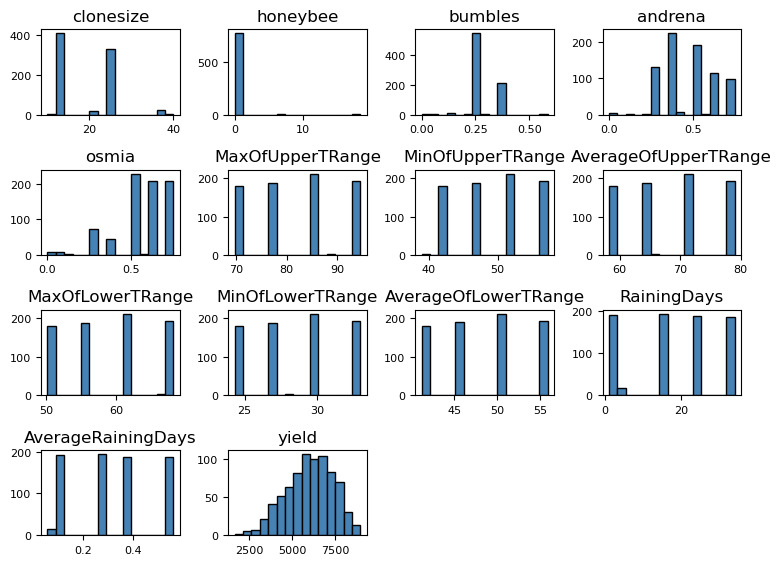

In [27]:
data.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))